* The main motive is to test if the changes in the bottom B.C influences the simulation results. (Probably it is too deep to have an influence)! 

In [14]:
%matplotlib inline
import sys,os
import ats_xdmf
import plot_column_data
import colors
import numpy as np
import matplotlib.cm
from matplotlib import pyplot as plt
import h5py
import pandas as pd
import matplotlib.gridspec as gridspec
import os

In [15]:
df_obs_AWS = pd.read_csv('/home/rk/ats_rk/testing/ats-demos/rk_model/Data/Data_Yakou/Yakou_met_data_ITP_rk/Final_OutputData_4yrs/Calib_outputdata_2016_2018.csv',sep='\t')
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),Soil temperature at - 0.1 m (°C),Soil temperature at - 0.2 m (°C),Soil temperature at - 0.4 m (°C),Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C)
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,-11.848819,-11.295486,-9.824722,-7.814958,-4.874889,-3.447965
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,-11.342569,-10.947708,-9.781389,-7.936854,-5.063889,-3.639549
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,-11.200694,-10.765278,-9.618403,-7.946111,-5.228028,-3.817500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,-11.365486,-10.867778,-9.648889,-7.977951,-5.358771,-3.977958
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,-11.691181,-11.171181,-9.829653,-8.078194,-5.476889,-4.119438


In [16]:
### Temperature from degree celcius to Kelvin

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

for i, depth in enumerate(depths):
    df_obs_AWS[f'point -{depth} temperature [K]'] = df_obs_AWS[f'Soil temperature at - {depth} m (°C)'] + 273.15
    
df_obs_AWS.head()

,TIMESTAMP,Soil moisture at - 0.04 m (%),Soil moisture at - 0.1 m (%),Soil moisture at - 0.2 m (%),Soil moisture at - 0.4 m (%),Soil moisture at - 0.8 m (%),Soil moisture at - 1.2 m (%),Soil moisture at - 1.6 m (%),Soil temperature at - 0.00 m (°C),Soil temperature at - 0.04 m (°C),...,Soil temperature at - 0.8 m (°C),Soil temperature at - 1.2 m (°C),Soil temperature at - 1.6 m (°C),point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K]
0,2016-01-01,7.897694,7.523868,8.694236,9.016111,5.368792,4.093549,6.058042,-13.103958,-12.507847,...,-7.814958,-4.874889,-3.447965,260.642153,261.301181,261.854514,263.325278,265.335042,268.275111,269.702035
1,2016-01-02,7.991826,7.594250,8.745417,9.012639,5.350889,4.060958,6.008417,-12.255417,-11.861597,...,-7.936854,-5.063889,-3.639549,261.288403,261.807431,262.202292,263.368611,265.213146,268.086111,269.510451
2,2016-01-03,7.992500,7.606875,8.766806,9.033472,5.342833,4.033590,5.962187,-12.737500,-11.824514,...,-7.946111,-5.228028,-3.817500,261.325486,261.949306,262.384722,263.531597,265.203889,267.921972,269.332500
3,2016-01-04,7.960069,7.581465,8.749236,9.025833,5.336757,4.012583,5.923819,-13.006597,-11.997847,...,-7.977951,-5.358771,-3.977958,261.152153,261.784514,262.282222,263.501111,265.172049,267.791229,269.172042
4,2016-01-05,7.913792,7.539000,8.703056,8.995694,5.324597,3.993715,5.892174,-13.525278,-12.371597,...,-8.078194,-5.476889,-4.119438,260.778403,261.458819,261.978819,263.320347,265.071806,267.673111,269.030562


In [17]:
####  Converting Soil moisture content to saturation of liquid

depths = [0.04, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6]

depth_peat = 0.3
poro_peat = 0.501199
poro_mineral = 0.407367

for i, depth in enumerate(depths):
    if depth < depth_peat:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_peat*100)
    else:
        df_obs_AWS[f'point -{depth} saturation liquid'] = df_obs_AWS[f'Soil moisture at - {depth} m (%)']/(poro_mineral*100)

### Results from BC = 268.45 K

In [27]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

In [28]:
# Reading the csv file 
df_observation = pd.read_csv('Case1_su_cv_start.demo/test_ats.demo/observations.dat', skiprows=88, sep=' ')
df_observation['time [days]'] = df_observation['time [s]']/86400
df_observation.index = df_observation['time [days]']

df_observation.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,0.224325,0.224325,0.224325,0.159498,0.159500,0.159504,0.159509,0.0
1.0,86400.0,260.937752,261.528776,262.625293,263.403539,264.993725,266.718276,267.981751,0.224325,0.224325,0.224326,0.159498,0.159500,0.159504,0.159508,1.0
2.0,172800.0,260.913298,261.910368,263.053829,263.753338,265.097135,266.643356,267.853158,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159508,2.0
3.0,259200.0,260.775236,261.993762,263.251563,263.958150,265.192479,266.600528,267.748289,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,3.0
4.0,345600.0,260.415630,261.872205,263.295109,264.052260,265.259164,266.572964,267.662398,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,4.0


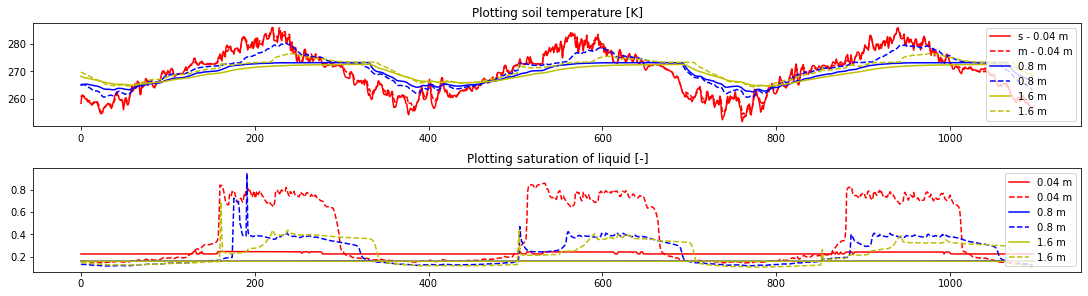

In [29]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
#f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
#f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

### Results from BC = 263.15 K

In [30]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

In [31]:
# Reading the csv file 
df_observation_1 = pd.read_csv('Case1_su_cv_start.demo/test_ats_bbc9.demo/observations.dat', skiprows=88, sep=' ')
df_observation_1['time [days]'] = df_observation_1['time [s]']/86400
df_observation_1.index = df_observation_1['time [days]']

df_observation_1.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,0.224325,0.224325,0.224325,0.159498,0.159500,0.159504,0.159509,0.0
1.0,86400.0,260.937754,261.528782,262.625300,263.403545,264.993727,266.718277,267.981751,0.224325,0.224325,0.224326,0.159498,0.159500,0.159504,0.159508,1.0
2.0,172800.0,260.913299,261.910371,263.053835,263.753343,265.097138,266.643358,267.853159,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159508,2.0
3.0,259200.0,260.775238,261.993769,263.251572,263.958159,265.192485,266.600532,267.748291,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,3.0
4.0,345600.0,260.415631,261.872210,263.295117,264.052268,265.259171,266.572969,267.662401,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,4.0


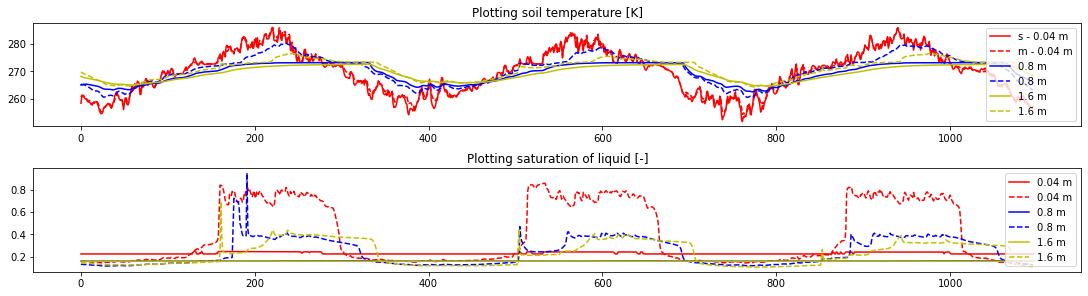

In [23]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
#f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
#f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

### Results from BC = 274.15 K

In [24]:
os.getcwd()

'/home/rk/pestpp/pestpp/rk_model_final_4yrs_su'

In [32]:
# Reading the csv file 
df_observation_2 = pd.read_csv('Case1_su_cv_start.demo/test_ats_bbc274.demo/observations.dat', skiprows=88, sep=' ')
df_observation_2['time [days]'] = df_observation_2['time [s]']/86400
df_observation_2.index = df_observation_2['time [days]']

df_observation_2.head()

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,0.224325,0.224325,0.224325,0.159498,0.159500,0.159504,0.159509,0.0
1.0,86400.0,260.992359,261.599229,262.661402,263.415364,264.984864,266.712834,267.979841,0.224325,0.224325,0.224326,0.159498,0.159500,0.159504,0.159508,1.0
2.0,172800.0,260.961726,261.999905,263.125688,263.800358,265.099566,266.631418,267.844537,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159508,2.0
3.0,259200.0,260.800642,262.056889,263.322789,264.019119,265.211605,266.589093,267.733719,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,3.0
4.0,345600.0,260.435513,261.920728,263.354922,264.108637,265.286998,266.569222,267.649049,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,4.0


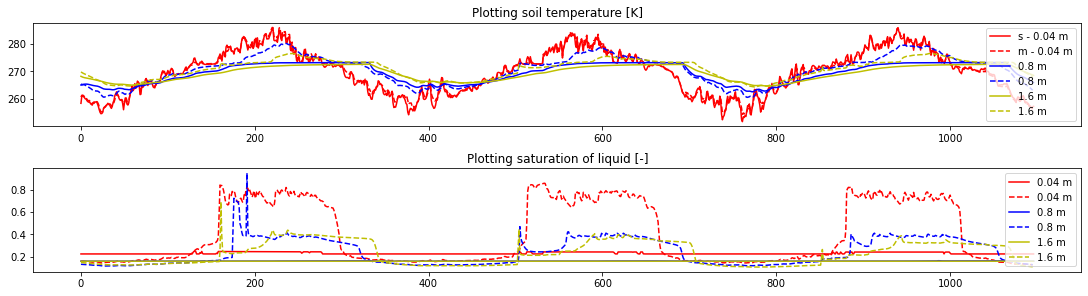

In [26]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,4), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
#f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='0.04 m')
f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
#f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

In [33]:
df_observation

,time [s],point -0.04 temperature [K],point -0.1 temperature [K],point -0.2 temperature [K],point -0.4 temperature [K],point -0.8 temperature [K],point -1.2 temperature [K],point -1.6 temperature [K],point -0.04 saturation liquid,point -0.1 saturation liquid,point -0.2 saturation liquid,point -0.4 saturation liquid,point -0.8 saturation liquid,point -1.2 saturation liquid,point -1.6 saturation liquid,time [days]
time [days],,,,,,,,,,,,,,,,
0.0,0.0,258.367326,259.833831,261.545082,262.858144,264.988292,266.860213,268.139169,0.224325,0.224325,0.224325,0.159498,0.159500,0.159504,0.159509,0.0
1.0,86400.0,260.937752,261.528776,262.625293,263.403539,264.993725,266.718276,267.981751,0.224325,0.224325,0.224326,0.159498,0.159500,0.159504,0.159508,1.0
2.0,172800.0,260.913298,261.910368,263.053829,263.753338,265.097135,266.643356,267.853158,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159508,2.0
3.0,259200.0,260.775236,261.993762,263.251563,263.958150,265.192479,266.600528,267.748289,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,3.0
4.0,345600.0,260.415630,261.872205,263.295109,264.052260,265.259164,266.572964,267.662398,0.224325,0.224326,0.224326,0.159499,0.159501,0.159504,0.159507,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092.0,94348800.0,257.454881,260.367610,263.203169,264.627391,266.551927,268.008245,268.956819,0.224325,0.224325,0.224326,0.159500,0.159504,0.159508,0.159513,1092.0
1093.0,94435200.0,257.091875,260.099388,262.979183,264.421391,266.373268,267.857476,268.828016,0.224325,0.224325,0.224326,0.159500,0.159503,0.159508,0.159512,1093.0
1094.0,94521600.0,256.383556,259.627674,262.667766,264.173499,266.185322,267.703873,268.697651,0.224325,0.224325,0.224326,0.159499,0.159503,0.159507,0.159511,1094.0


### Comparing the results

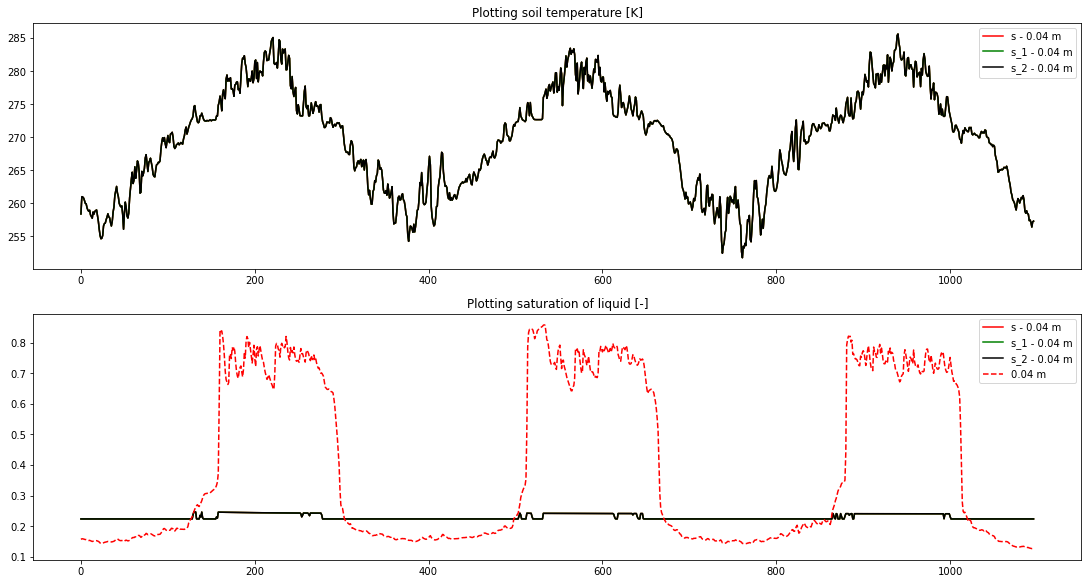

In [40]:
### Plotting the final results (mesured vs simulated) along with the parameters:
### Plotting the temperature for different alpha values at depth 0.01 m
fig2 = plt.figure(figsize=(15,8), constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, height_ratios=[1,1], figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])


# Plotting temperature
f2_ax1.set_title('Plotting soil temperature [K]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax1.plot(df_observation['point -0.04 temperature [K]'],'r',label='s - 0.04 m')
f2_ax1.plot(df_observation_1['point -0.04 temperature [K]'],'g',label='s_1 - 0.04 m')
f2_ax1.plot(df_observation_2['point -0.04 temperature [K]'],'k',label='s_2 - 0.04 m')
#f2_ax1.plot(df_obs_AWS['point -0.04 temperature [K]'].values,'r--',label='m - 0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
#f2_ax1.plot(df_observation['point -0.8 temperature [K]'],'b',label='0.8 m')
#f2_ax1.plot(df_obs_AWS['point -0.8 temperature [K]'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
#f2_ax1.plot(df_observation['point -1.6 temperature [K]'],'y',label='1.6 m')
#f2_ax1.plot(df_obs_AWS['point -1.6 temperature [K]'].values,'y--',label='1.6 m')
#f2_ax1.set_xlim(0,1500)
f2_ax1.legend()

# Plotting saturation of liquid
f2_ax2.set_title('Plotting saturation of liquid [-]')
#plt.plot(df_observation['point -0.01 temperature [K]'][:1000],label='0.01 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'r',label='s - 0.04 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'g',label='s_1 - 0.04 m')
f2_ax2.plot(df_observation['point -0.04 saturation liquid'],'k',label='s_2 - 0.04 m')

f2_ax2.plot(df_obs_AWS['point -0.04 saturation liquid'].values,'r--',label='0.04 m')

#f2_ax1.plot(df_observation['point -0.2 temperature [K]'],label='0.2 m')
#f2_ax1.plot(df_observation['point -0.4 temperature [K]'],label='0.4 m')
#f2_ax2.plot(df_observation['point -0.8 saturation liquid'],'b',label='0.8 m')
#f2_ax2.plot(df_obs_AWS['point -0.8 saturation liquid'].values,'b--',label='0.8 m')
#f2_ax1.plot(df_observation['point -1.2 temperature [K]'],label='1.2 m')
#f2_ax2.plot(df_observation['point -1.6 saturation liquid'],'y',label='1.6 m')
#f2_ax2.plot(df_obs_AWS['point -1.6 saturation liquid'].values,'y--',label='1.6 m')
#f2_ax2.set_xlim(0,1500)
f2_ax2.legend()

### Seems like there is no drastic difference with changing bottom B.C - Maybe on a longer term